## Introduction to neural network classification with tensorflow

A few types of classification problems:
1. binary classification
2. multiclass classification
3. multilabel classification

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,noise = 0.03,random_state = 42)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

circles = pd.DataFrame({"x0":X[:,0],"x1":X[:,1],"label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


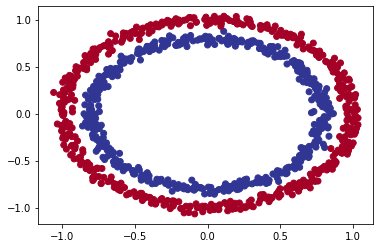

In [ ]:
plt.scatter(circles["x0"],circles["x1"], c = y,cmap = plt.cm.RdYlBu);

## steps in modeling
1. create or import model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak
6. evaluate...

In [ ]:
# create model 1

# set the random seed
tf.random.set_seed(42)

# 1. create the model using the sequential api
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. fit the model
model_1.fit(X,y,epochs = 100,verbose = 0)

# 4. evaluate the model
model_1.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 3.6831 - accuracy: 0.4210


[3.683102607727051, 0.42100000381469727]

In [ ]:
# create model 2

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
model_2.fit(X,y,epochs = 100, verbose = 0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7568 - accuracy: 0.4640


[0.7567534446716309, 0.46399998664855957]

In [ ]:
import numpy as np

In [ ]:
def plot_decision_model(model,X,y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
  x_in = np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_in)
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred,axis = 1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,cmap = plt.cm.RdYlBu,alpha = 0.7)
  plt.scatter(X[:,0],X[:,1], c=y,s=40,cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classification


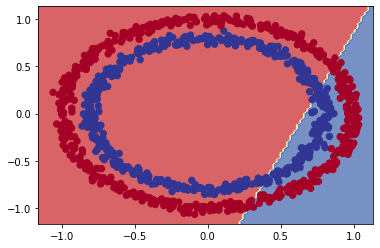

In [ ]:
plot_decision_model(model_2,X,y)

# Non-linearity

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])
history = model_3.fit(X,y,epochs = 100,verbose = 0)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


313/313 [==============================] - 0s 1ms/step
doing binary classification


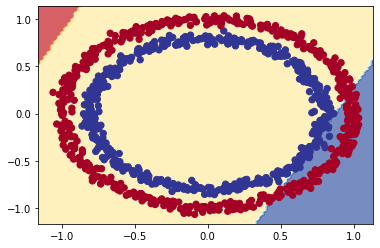

In [ ]:
plot_decision_model(model = model_3,X = X,y= y)

In [ ]:
# upgraded model
upgraded_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
upgraded_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                       optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                       metrics = ["accuracy"])
upgraded_model.fit(X,y,epochs = 100 ,verbose = 0)

In [ ]:
upgraded_model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.6880


[0.5885784029960632, 0.6880000233650208]

313/313 [==============================] - 0s 1ms/step
doing binary classification


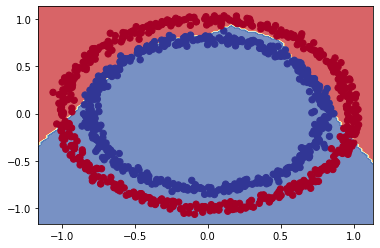

In [ ]:
plot_decision_model(model = upgraded_model,X = X,y=y)

# checking the activations functions

In [ ]:
# create a random tensor
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

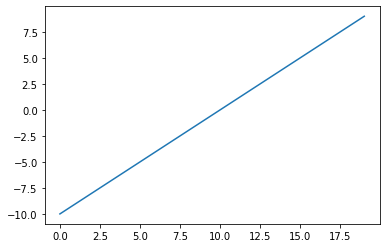

In [ ]:
plt.plot(A);

In [ ]:
# sigmoid activation function
tf.keras.activations.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105123e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425877e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

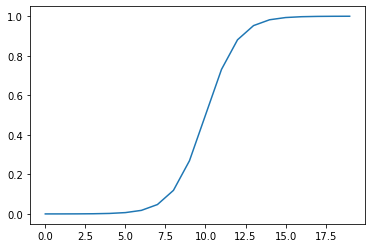

In [ ]:
# plotting the sigmoid function
plt.plot(tf.keras.activations.sigmoid(A))

In [ ]:
# checking the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

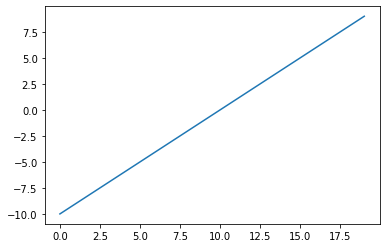

In [ ]:
# plotting the linear activation function
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# checking the relu activaton function
tf.keras.activations.relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

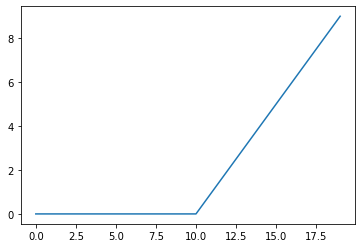

In [ ]:
# plotting the reluc activation function
plt.plot(tf.keras.activations.relu(A))

In [ ]:
# checking the tanh activation function
tf.keras.activations.tanh(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-1.        , -1.        , -1.        , -0.99999833, -0.99998784,
       -0.99990916, -0.9993292 , -0.9950547 , -0.9640276 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640276 ,  0.9950547 ,  0.9993292 ,
        0.99990916,  0.99998784,  0.99999833,  1.        ,  1.        ],
      dtype=float32)>

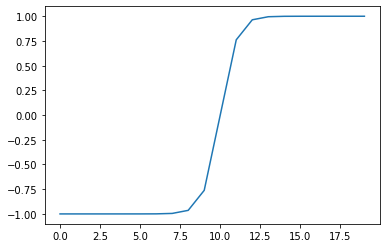

In [ ]:
# plotting the tanh activation function
plt.plot(tf.keras.activations.tanh(A))

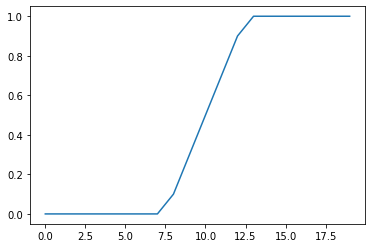

In [ ]:
plt.plot(tf.keras.activations.hard_sigmoid(A))

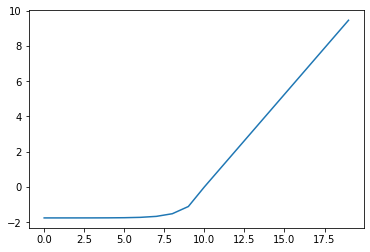

In [ ]:
plt.plot(tf.keras.activations.selu(A))

In [ ]:
tf.random.set_seed(42)
tf.random.uniform(shape = [3,3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.6645621 , 0.44100678, 0.3528825 ],
       [0.46448255, 0.03366041, 0.68467236],
       [0.74011743, 0.8724445 , 0.22632635]], dtype=float32)>

In [ ]:
tf.random.set_seed(42)
tf.random.uniform(shape = (3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.6645621 , 0.44100678, 0.3528825 ],
       [0.46448255, 0.03366041, 0.68467236],
       [0.74011743, 0.8724445 , 0.22632635]], dtype=float32)>

In [ ]:
uniform_distribution = tf.random.Generator.from_seed(42)
uniform_distribution = uniform_distribution.uniform(shape = (3,2))

uniform_distribution

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.7493447 , 0.73561966],
       [0.45230794, 0.49039817],
       [0.1889317 , 0.52027524]], dtype=float32)>

In [ ]:
# splitting into a train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
# creating a upgraded model
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Dense(4, activation = "relu"))
final_model.add(tf.keras.layers.Dense(4, activation = "relu"))
final_model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

final_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                    optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                    metrics = ["accuracy"])

history = final_model.fit(X_train, y_train, epochs = 100, verbose = 0)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
final_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (32, 4)                   12        
                                                                 
 dense_17 (Dense)            (32, 4)                   20        
                                                                 
 dense_18 (Dense)            (32, 1)                   5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


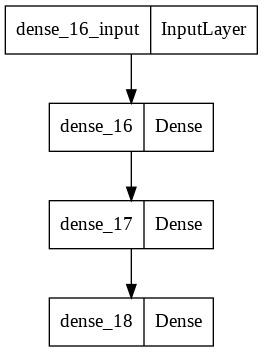

In [ ]:
tf.keras.utils.plot_model(final_model)

In [ ]:
final_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9750


[0.06019866093993187, 0.9750000238418579]

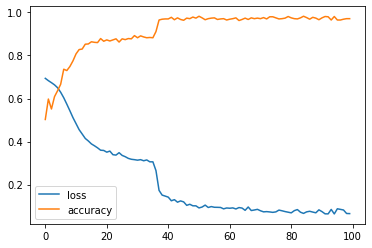

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

# callbacks

## finding the ideal learning rate values

In [ ]:
# using a learning rate scheduler

tf.random.set_seed(42)
model_7 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation = "relu"),
        tf.keras.layers.Dense(4, activation = "relu"),
        tf.keras.layers.Dense(1, activation = "sigmoid")
    ]
)
model_7.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

# creating the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history = model_7.fit(X_train, 
            y_train,
            epochs = 100,
            verbose = 0,
            callbacks = [lr_scheduler])

In [ ]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 1.1822 - accuracy: 0.4950


[1.1822245121002197, 0.4950000047683716]

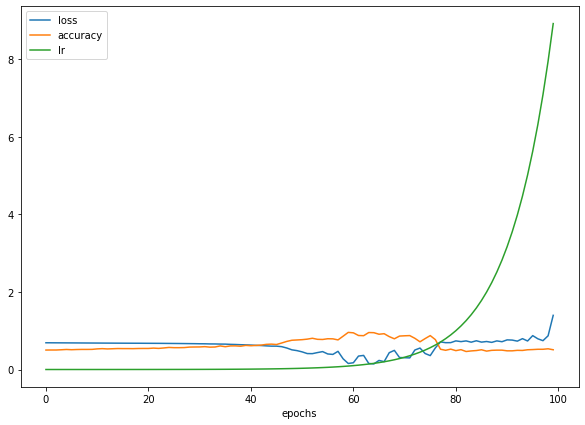

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 7), xlabel = "epochs");

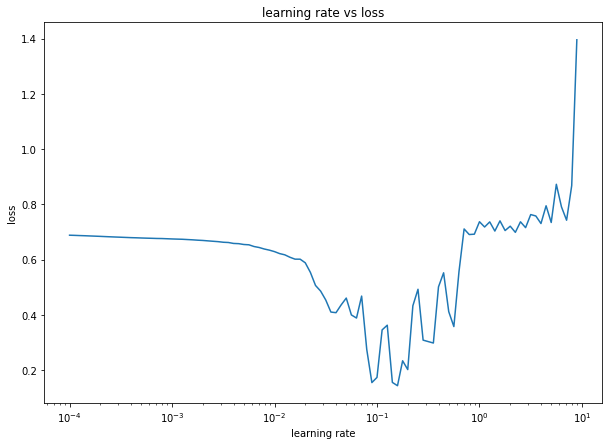

In [ ]:
# plotting the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss");

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


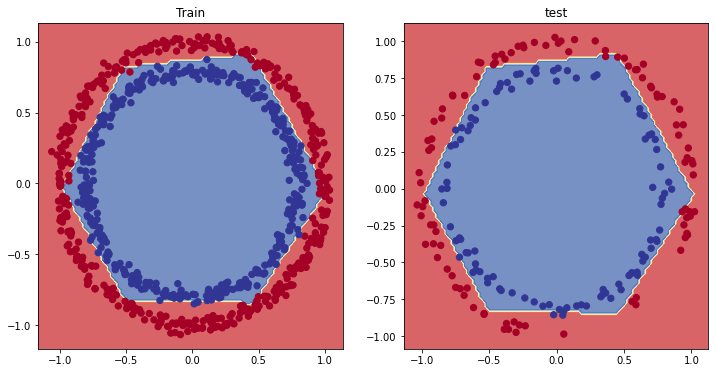

In [ ]:
# plotting the decision boundary curve for model_8
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_model(final_model, X = X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_model(final_model,X = X_test, y = y_test)
plt.show();

# classification evaluation methods

In [ ]:
# # accuracy
# tf.keras.metrics.Accuracy()

# # precision
# tf.keras.metrics.Precision()

# #recall
# tf.keras.metrics.Recall()

# # f1 score
# sklearn.metrics.f1_score()

# #confusion matricx
# sklearn.metrics.confusion_matrix()

In [ ]:
# accuracy
loss, accuracy = final_model.evaluate(X_test,y_test)
loss, accuracy

7/7 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9750


(0.06019866093993187, 0.9750000238418579)

In [ ]:
y_preds = tf.round(final_model.predict(X_test))

7/7 [==============================] - 0s 3ms/step


In [ ]:
# building the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_preds)

array([[96,  3],
       [ 2, 99]])

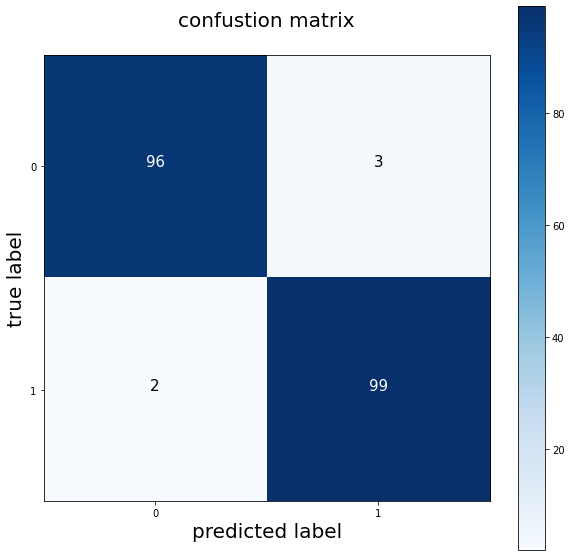

In [ ]:
# creating a plot for confusion matrix

import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, y_preds)
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize = figsize)

cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title = "confustion matrix",
       xlabel = "predicted label",
       ylabel = "true label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) /2


for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]}",
           horizontalalignment = "center",
           color = "white" if cm[i,j] > threshold else "black",
           size = 15);

In [ ]:
itertools.product(range(cm.shape[0]),range(cm.shape[1]))

In [ ]:
normalize